In [21]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Load the data set
ipl_auction_df = pd.read_csv( 'IPL IMB381IPL2013.csv' )
type(ipl_auction_df)

In [ ]:
ipl_auction_df.head(5)

In [ ]:
#Finding metadata of the DataFrame
list(ipl_auction_df.columns)

In [ ]:
#Transpose of the df
ipl_auction_df.head(5).transpose()

In [ ]:
ipl_auction_df.shape

In [ ]:
#Finding Summary of the DataFrame
ipl_auction_df.info()

In [ ]:
#Slicing and Indexing a dataframe
ipl_auction_df[0:5]

In [ ]:
#Slicing and Indexing a dataframe
ipl_auction_df[-5:]

In [ ]:
#Selecting Columns by Column Names
ipl_auction_df['PLAYER NAME'][0:5]

In [ ]:
#Selecting Columns by Column Names
ipl_auction_df[['PLAYER NAME', 'COUNTRY']][0:5]

In [ ]:
#Selecting Rows and Columns by indexes
ipl_auction_df.iloc[4:9, 1:4]

In [ ]:
#Finding Unique Occurances of Values in Columns
ipl_auction_df.COUNTRY.value_counts()

In [ ]:
#Cross-tabulation between two columns
pd.crosstab( ipl_auction_df['AGE'], ipl_auction_df['PLAYING ROLE'] )

In [ ]:
#Sorting dataframe by column values
ipl_auction_df[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE')

In [ ]:
#Creating new columns
#Which player got the maximum premium on the base price?

ipl_auction_df['premium'] = ipl_auction_df['SOLD PRICE'] - ipl_auction_df['BASE
PRICE']

In [ ]:
#Display the newly created 
ipl_auction_df[['PLAYER NAME', 'BASE PRICE', 'SOLD PRICE', 'premium']][0:5]

In [ ]:
#Grouping and Aggregating
#What is the average SOLD PRICE for each age category?
ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean()

In [ ]:
#Removing a column
ipl_auction_df.drop( 'Sl.NO.', inplace = True, axis = 1)

In [ ]:
#Re-Naming Columns
ipl_auction_df.rename(columns={"PLAYER NAME":"PLAYER","BASE PRICE":"Minimum Price"})


# Missing values handling

In [22]:
autos = pd.read_csv('auto-mpg.data', sep ='\s+', header = None)


In [24]:
autos.columns = [ 'mpg','cylinders', 'displacement',
'horsepower', 'weight', 'acceleration',
'year', 'origin', 'name']
autos.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [25]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [31]:
autos['horsepower'] = pd.to_numeric(autos['horsepower'],errors = "coerce") 


In [32]:
#Find NaN values in the data
autos[autos.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [35]:
#Drop the NaN rows
autos = autos.dropna()

In [36]:
#Check if any NaNs
autos[autos.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


# EXPLORATION OF DATA USING VISUALIZATION

In [37]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/Users/srinivasgurrala/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


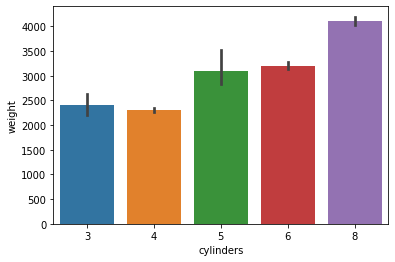

In [40]:
#bar plot
sn.barplot(x = 'cylinders', y = 'weight', data = autos);

(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

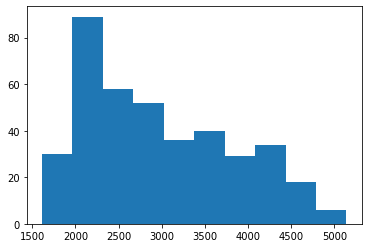

In [42]:
#Histogram
plt.hist(autos['weight'])

<AxesSubplot:>

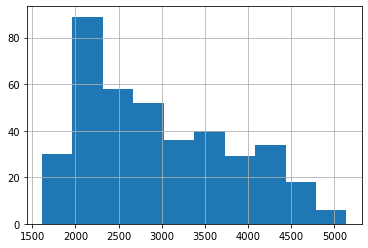

In [43]:
autos.weight.hist()  #Pandas method


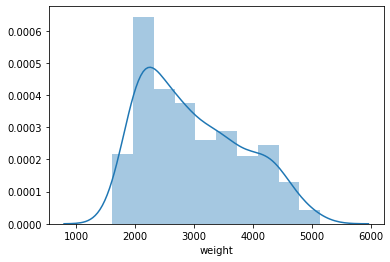

In [45]:
#Distribution or Density Plot
sn.distplot(autos['weight']);

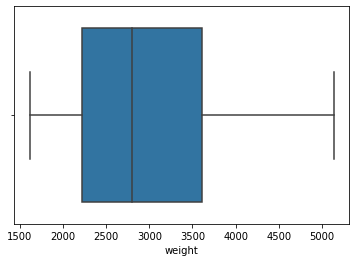

In [49]:
#Box Plot
box=sn.boxplot(autos['weight'])

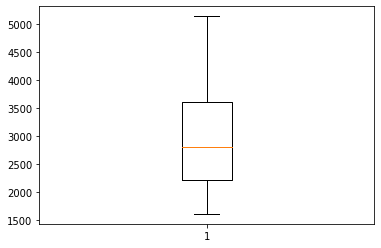

In [54]:
box = plt.boxplot(autos['weight'])

In [55]:
#to find max and min 
[item.get_ydata()[0] for item in box['caps']]

[1613.0, 5140.0]

In [57]:
#Outliers detection
autos[autos['weight'] > 5140.0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


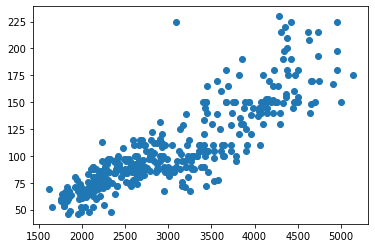

In [58]:
#Scatter Plot
plt.scatter( x = autos['weight'],y = autos['horsepower']);

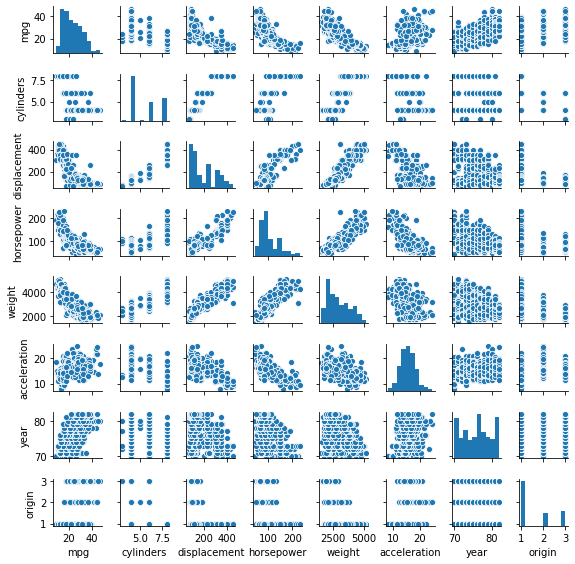

In [61]:
#Pair Plot
sn.pairplot(autos, height=1) # height is size of the plot

In [62]:
#Correlation and Heatmap
autos.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


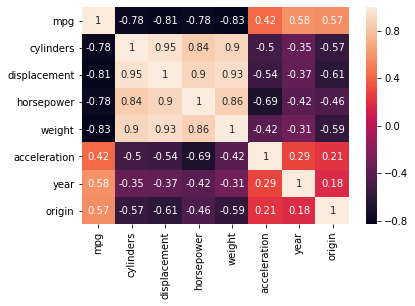

In [65]:
sn.heatmap(autos.corr(), annot=True);